## Câu hỏi
**Đối với mỗi thể loại anime, Studio nào có sở trường sản xuất thể loại anime đó?**

**Ý nghĩa**: Một studio có kinh nghiệm và thành tích tốt trong một thể loại anime cụ thể sẽ cho ra các sản phẩm có chất lượng tốt hơn, góp phần đảm bảo được sự thành công của bộ anime đó. Việc biết được studio nào có sở trường trong thể loại nào sẽ giúp nhà sản xuất đưa ra quyết định phù hợp.

**Hướng giải quyết**: Với mỗi thể loại, với mỗi studio ta sẽ xét những anime thuộc thể loại đó mà studio thực hiện, ta đánh giá qua hai yếu tố là: số anime sản xuất và `Score` trung bình của những anime sản xuất.

---

## Cài đặt thư viện

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

Các đường dẫn:

In [194]:
HOME = os.getcwd()
DATASET_PATH = os.path.join(HOME, 'raw_animes_dataset')
ANIME_DATASET_2023 = os.path.join(DATASET_PATH, 'anime-dataset-2023.csv')
DATA_PREPROCESSING = os.path.join(HOME, 'Data Preprocessing')
CLEAN_ANIME_DATASET_2023 = os.path.join(DATA_PREPROCESSING, 'anime-data-preprocessing.csv')


print(f'Home: {HOME}')  
print(f'Dataset Path: {DATASET_PATH}')
print(f'Anime Dataset 2023: {ANIME_DATASET_2023}')
print(f'Data Preprocessing: {DATA_PREPROCESSING}')
print(f'Clean Anime Dataset 2023: {CLEAN_ANIME_DATASET_2023}')

Home: e:\Final_Project_DataScienceProgramming
Dataset Path: e:\Final_Project_DataScienceProgramming\raw_animes_dataset
Anime Dataset 2023: e:\Final_Project_DataScienceProgramming\raw_animes_dataset\anime-dataset-2023.csv
Data Preprocessing: e:\Final_Project_DataScienceProgramming\Data Preprocessing
Clean Anime Dataset 2023: e:\Final_Project_DataScienceProgramming\Data Preprocessing\anime-data-preprocessing.csv


---

## Đọc dữ liệu 

In [195]:
df = pd.read_csv(CLEAN_ANIME_DATASET_2023)

In [196]:
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               13834 non-null  object 
 1   Score              13834 non-null  float64
 2   Genres             13834 non-null  object 
 3   Synopsis           13834 non-null  object 
 4   Type               13834 non-null  object 
 5   Episodes           13834 non-null  float64
 6   Producers          13834 non-null  object 
 7   Studios            13834 non-null  object 
 8   Source             13834 non-null  object 
 9   Time per ep (Min)  13834 non-null  float64
 10  Rating             13834 non-null  object 
 11  Rank               13834 non-null  int64  
 12  Popularity         13834 non-null  int64  
 13  Favorites          13834 non-null  int64  
 14  Scored By          13834 non-null  int64  
 15  Members            13834 non-null  int64  
 16  Released date      138

,Name,Score,Genres,Synopsis,Type,Episodes,Producers,Studios,Source,Time per ep (Min),Rating,Rank,Popularity,Favorites,Scored By,Members,Released date,Completed date
0,Fullmetal Alchemist: Brotherhood,9.10,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...,TV,64.0,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Manga,24.0,R - 17+ (violence & profanity),1,3,217606,2020030,3176556,2009-04-05,2010-07-04
1,Steins;Gate,9.07,"Drama, Sci-Fi, Suspense",Eccentric scientist Rintarou Okabe has a never...,TV,24.0,"Frontier Works, Media Factory, Kadokawa Shoten...",White Fox,Visual novel,24.0,PG-13 - Teens 13 or older,2,13,182964,1336233,2440369,2011-04-06,2011-09-14
2,Bleach: Sennen Kessen-hen,9.07,"Action, Adventure, Fantasy",Substitute Soul Reaper Ichigo Kurosaki spends ...,TV,13.0,"TV Tokyo, Aniplex, Dentsu, Shueisha",Pierrot,Manga,24.0,R - 17+ (violence & profanity),3,464,17999,213872,445198,2022-10-11,2022-12-27
3,Gintama°,9.06,"Action, Comedy, Sci-Fi","Gintoki, Shinpachi, and Kagura return as the f...",TV,51.0,"TV Tokyo, Aniplex, Dentsu",Bandai Namco Pictures,Manga,24.0,PG-13 - Teens 13 or older,4,331,15947,237957,595767,2015-04-08,2016-03-30
4,Shingeki no Kyojin Season 3 Part 2,9.05,"Action, Drama",Seeking to restore humanity's diminishing hope...,TV,10.0,"Production I.G, Dentsu, Mainichi Broadcasting ...",Wit Studio,Manga,23.0,R - 17+ (violence & profanity),5,24,55245,1471825,2104016,2019-04-29,2019-07-01


---

## Tiền xử lý dữ liệu

#### Trích ra những cột mà ta quan tâm trong bài này

In [197]:
df = df[['Name', 'Score', 'Genres', 'Studios']]
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     13834 non-null  object 
 1   Score    13834 non-null  float64
 2   Genres   13834 non-null  object 
 3   Studios  13834 non-null  object 
dtypes: float64(1), object(3)
memory usage: 432.4+ KB
None


,Name,Score,Genres,Studios
0,Fullmetal Alchemist: Brotherhood,9.10,"Action, Adventure, Drama, Fantasy",Bones
1,Steins;Gate,9.07,"Drama, Sci-Fi, Suspense",White Fox
2,Bleach: Sennen Kessen-hen,9.07,"Action, Adventure, Fantasy",Pierrot
3,Gintama°,9.06,"Action, Comedy, Sci-Fi",Bandai Namco Pictures
4,Shingeki no Kyojin Season 3 Part 2,9.05,"Action, Drama",Wit Studio


#### Kiểm tra các giá trị UNKNOWN còn lẫn trong cột 'Studios'

In [198]:
columns_to_check = ['Studios']

for column in columns_to_check:
    unknown_count = df[column].apply(lambda x: x.lower() == 'unknown').sum()
    print(f'Unknown count in {column}: {unknown_count}. Ratio: {unknown_count / len(df) * 100:.2f}%')

Unknown count in Studios: 2345. Ratio: 16.95%


Ở đây tỉ lệ UNKNOWN là 17.03%, ta sẽ xóa luôn các dòng có chứa UNKNOWN

In [199]:
df = df[df['Studios'].apply(lambda x: x.lower() != 'unknown')]

In [200]:
print(df.info())   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11489 entries, 0 to 13833
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     11489 non-null  object 
 1   Score    11489 non-null  float64
 2   Genres   11489 non-null  object 
 3   Studios  11489 non-null  object 
dtypes: float64(1), object(3)
memory usage: 448.8+ KB
None


#### Chuyển hai cột thuộc tính 'Genres' và 'Studios' về dạng đơn nhãn

In [201]:
# Biến dữ liệu thành list
df['Genres'] = df['Genres'].apply(lambda x: [name.strip() for name in x.split(',')])
df['Studios'] = df['Studios'].apply(lambda x: [name.strip() for name in x.split(',')])

# Dùng explode để tạo ra các hàng mới từ
df = df.explode('Genres')
df = df.explode('Studios')

df = df.reset_index(drop=True)

In [202]:
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27781 entries, 0 to 27780
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     27781 non-null  object 
 1   Score    27781 non-null  float64
 2   Genres   27781 non-null  object 
 3   Studios  27781 non-null  object 
dtypes: float64(1), object(3)
memory usage: 868.3+ KB
None


,Name,Score,Genres,Studios
0,Fullmetal Alchemist: Brotherhood,9.10,Action,Bones
1,Fullmetal Alchemist: Brotherhood,9.10,Adventure,Bones
2,Fullmetal Alchemist: Brotherhood,9.10,Drama,Bones
3,Fullmetal Alchemist: Brotherhood,9.10,Fantasy,Bones
4,Steins;Gate,9.07,Drama,White Fox
5,Steins;Gate,9.07,Sci-Fi,White Fox
6,Steins;Gate,9.07,Suspense,White Fox
7,Bleach: Sennen Kessen-hen,9.07,Action,Pierrot
8,Bleach: Sennen Kessen-hen,9.07,Adventure,Pierrot
9,Bleach: Sennen Kessen-hen,9.07,Fantasy,Pierrot


---

## Trả lời câu hỏi

Nhắc lại hướng giải quyết: Với mỗi thể loại, với mỗi studio ta sẽ xét những anime thuộc thể loại đó mà studio thực hiện, ta đánh giá qua hai yếu tố là: số anime sản xuất và `Score` trung bình của những anime sản xuất.

Do cả `Score` và Số anime mà studio sản xuất đều quan trong, ta sẽ tìm cách kết hợp cả hai đặc tính này.

Trước tiên ta sẽ group dữ liệu theo `Genres` và sau đó theo `Studios`. Sau đó chúng ta lấy cột `Score` để tính hai giá trị: Trung bình các điểm số và Số anime mà studio sản xuất ứng với thể loại hiện tại.

In [203]:
grouped_df = df.groupby(['Genres', 'Studios'])['Score'].agg(mean_score='mean', anime_count='size').reset_index()
grouped_df.head(10)

,Genres,Studios,mean_score,anime_count
0,Action,2:10 AM Animation,6.620000,2
1,Action,7doc,6.180000,2
2,Action,8bit,7.095357,28
3,Action,A-1 Pictures,7.147128,94
4,Action,A-Line,6.450000,1
5,Action,A-Real,6.430000,1
6,Action,A.C.G.T.,6.681579,19
7,Action,ACC Production,5.140000,2
8,Action,AHA Entertainment,7.900000,2
9,Action,AIC,6.415147,68


Ta tạo thêm cột `anime_count_this_genre` để tính số tổng số anime được sản xuất trong một thể loại

In [204]:
total_anime_per_genre = grouped_df.groupby('Genres')['anime_count'].sum().reset_index()
# Đổi tên thuộc tính
total_anime_per_genre.rename(columns={'anime_count': 'anime_count_this_genre'}, inplace=True)

# Merge df mới vào grouped_df
grouped_df = grouped_df.merge(total_anime_per_genre, on='Genres')
grouped_df.head(10)


,Genres,Studios,mean_score,anime_count,anime_count_this_genre
0,Action,2:10 AM Animation,6.620000,2,3986
1,Action,7doc,6.180000,2,3986
2,Action,8bit,7.095357,28,3986
3,Action,A-1 Pictures,7.147128,94,3986
4,Action,A-Line,6.450000,1,3986
5,Action,A-Real,6.430000,1,3986
6,Action,A.C.G.T.,6.681579,19,3986
7,Action,ACC Production,5.140000,2,3986
8,Action,AHA Entertainment,7.900000,2,3986
9,Action,AIC,6.415147,68,3986


Để đánh giá khả năng một studio có trong việc sản xuất một thể loại anime, ta sẽ tạo ra thuộc tính `specialty_score`. 

Thuộc tính này tính bằng cách: `mean_score` * `anime_count` / `anime_count_this_genre`

In [205]:
grouped_df['specialty_score'] = grouped_df['mean_score'] * grouped_df['anime_count'] / grouped_df['anime_count_this_genre']
grouped_df

,Genres,Studios,mean_score,anime_count,anime_count_this_genre,specialty_score
0,Action,2:10 AM Animation,6.620000,2,3986,0.003322
1,Action,7doc,6.180000,2,3986,0.003101
2,Action,8bit,7.095357,28,3986,0.049842
3,Action,A-1 Pictures,7.147128,94,3986,0.168547
4,Action,A-Line,6.450000,1,3986,0.001618
...,...,...,...,...,...,...
4268,Suspense,Zero-G,5.940000,1,174,0.034138
4269,Suspense,Zexcs,6.230000,1,174,0.035805
4270,Suspense,animate Film,5.170000,1,174,0.029713
4271,Suspense,asread.,7.500000,2,174,0.086207


#### Trực quan hóa và Nhận xét

In [206]:
def drar_bar_chart(grouped_df, selected_genres, top_n=5, number_of_columns=3):
    fig, axes = plt.subplots(1, number_of_columns, figsize=(18, 6))
    if len(selected_genres) == 1:
        axes = [axes] 
        
    for i, genre in enumerate(selected_genres):
        genre_data = grouped_df[grouped_df['Genres'] == genre].nlargest(top_n, 'specialty_score')

        sns.barplot(data=genre_data, x='specialty_score', y='Studios', ax=axes[i], hue='Studios',  palette='viridis')
        axes[i].set_title(f'Top {top_n} Studios for {genre}')
        axes[i].set_xlabel('Specialty score')
        axes[i].set_ylabel('Studio')
        axes[i].set_xticks(axes[i].get_xticks()[::2])


    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

##### Các thể loại hành động, phiêu lưu ( `Action`, `Adventure`, `Fantasy`)

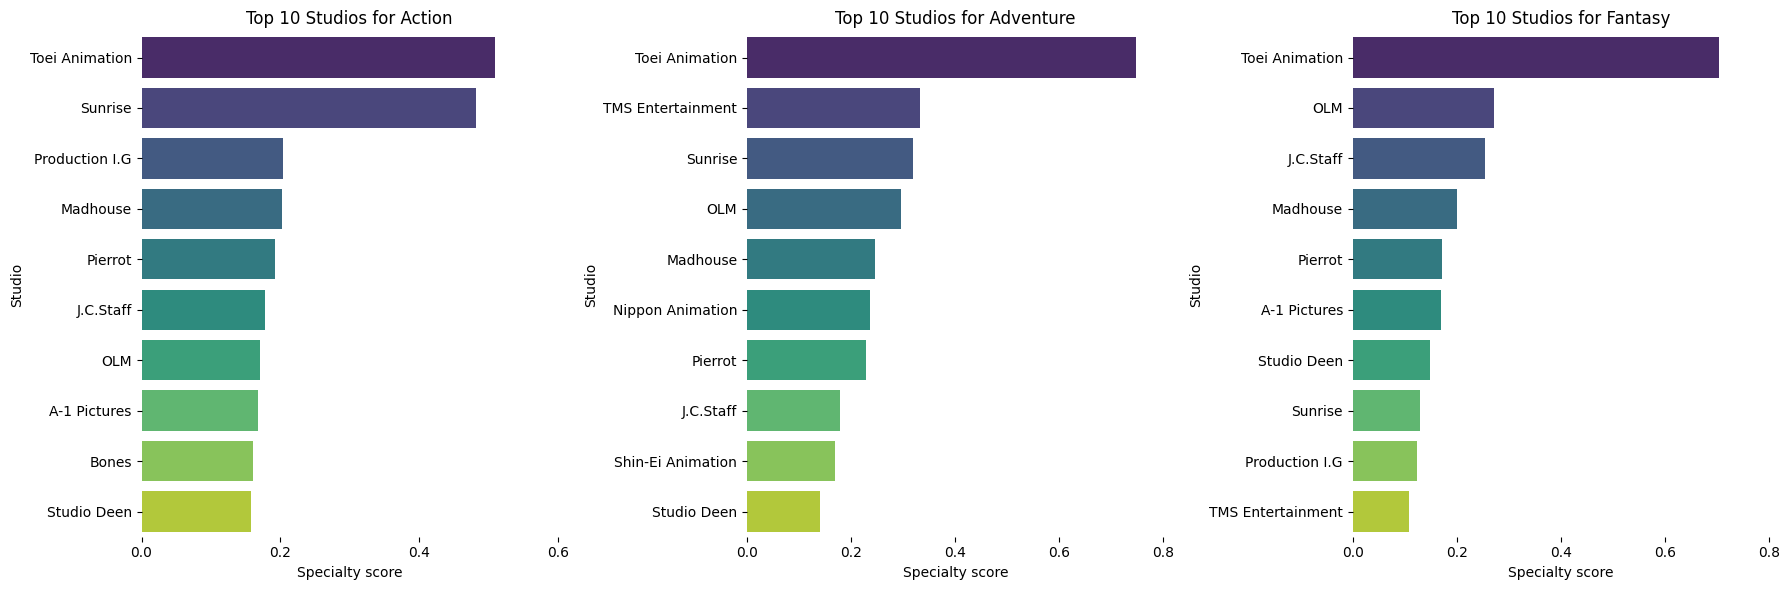

In [207]:
genres = ['Action', 'Adventure', 'Fantasy']
drar_bar_chart(grouped_df, genres, 10, 3)

- Top đầu thể loại này xoay quanh các tên quen thuộc như: Toei, Sunrise, OLM, Madhouse.
- Toei và Sunrise thống trị thể loại action, minh chứng qua các bộ anime kinh điển như Dragon Ball (Toei) và Mobile Suit Gundam (Sunrise)
- Toei Animation cũng đồng thời đứng nhất trong cả thể loại Adventure và Fantasy. Cũng không bất ngờ vì studio này có các tác phẩm kinh điển như: Dragon Ball, One Piece, Sailor Moon, Digimon.


##### Các thể loại hài hước, đời thường và lãng mạn (`Comedy`, `Slice of Life`, `Romance`)

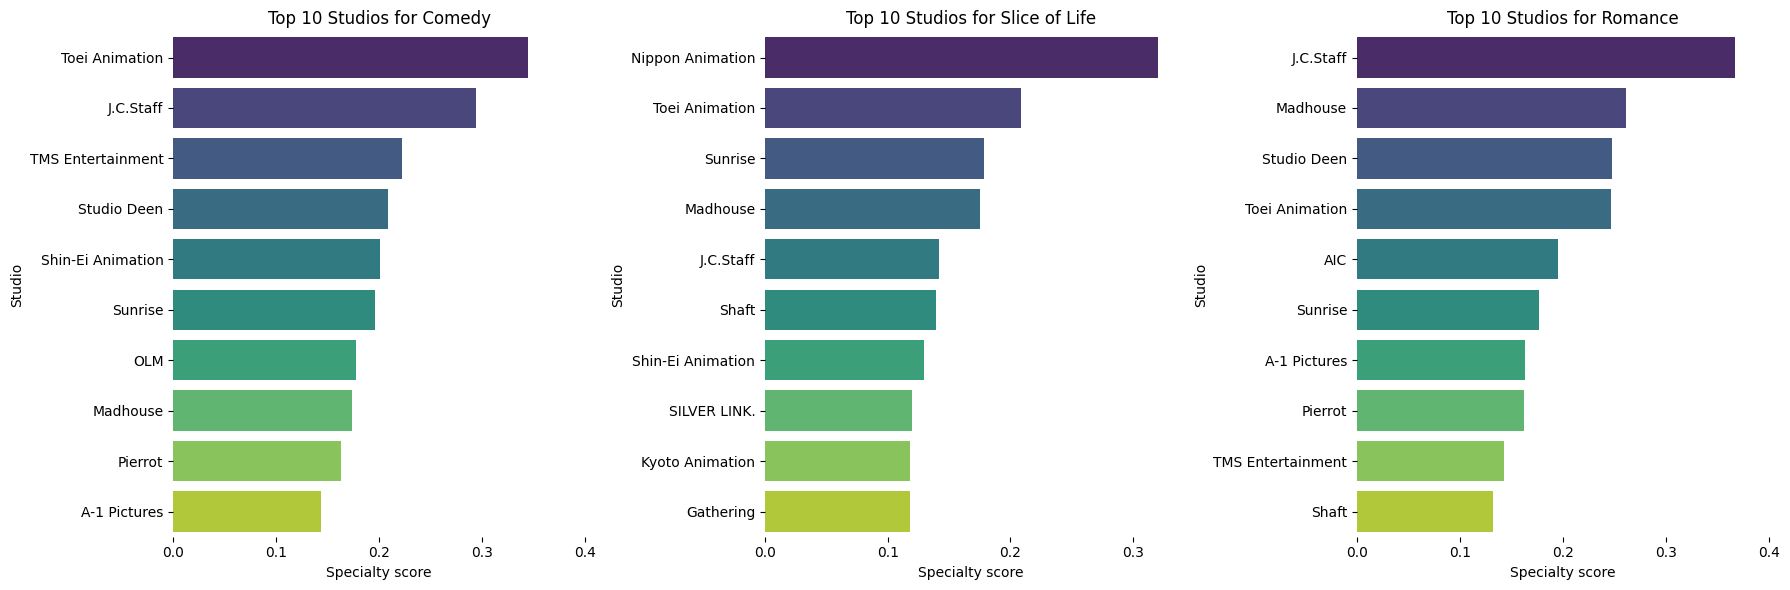

In [208]:
genres = ['Comedy', 'Slice of Life', 'Romance']
drar_bar_chart(grouped_df, genres, 10, 3)

- Toei đứng đầu trong thể loại Comedy, vượt qua top 2 là J.C.Staff. Các bộ anime nổi bật của Toei thường mang yếu tố hành động, nhưng các phần hài hước của chúng rất nhiều.
- J.C.Staff đứng nhất trong thể loại Romance. Đây là studio có sở trường về anime có mang yếu tố lãng mạng.
- Đứng đầu thể loại Slice of life là Nippon Animation, studio này sản xuất ra rất nhiều bộ anime về chủ đề gia đình, đời thường. Các tác phẩm của studio này chủ yếu sản xuất vào thập niên 70, 80 nên hiện tại giờ ít được nghe thấy.
 (vd: Heidi, cô bé đến từ vùng núi Alps; Anne tóc đỏ dưới chái nhà xanh)

##### Các thể loại thử nghiệm nghệ thuật (`Avant Garde`)

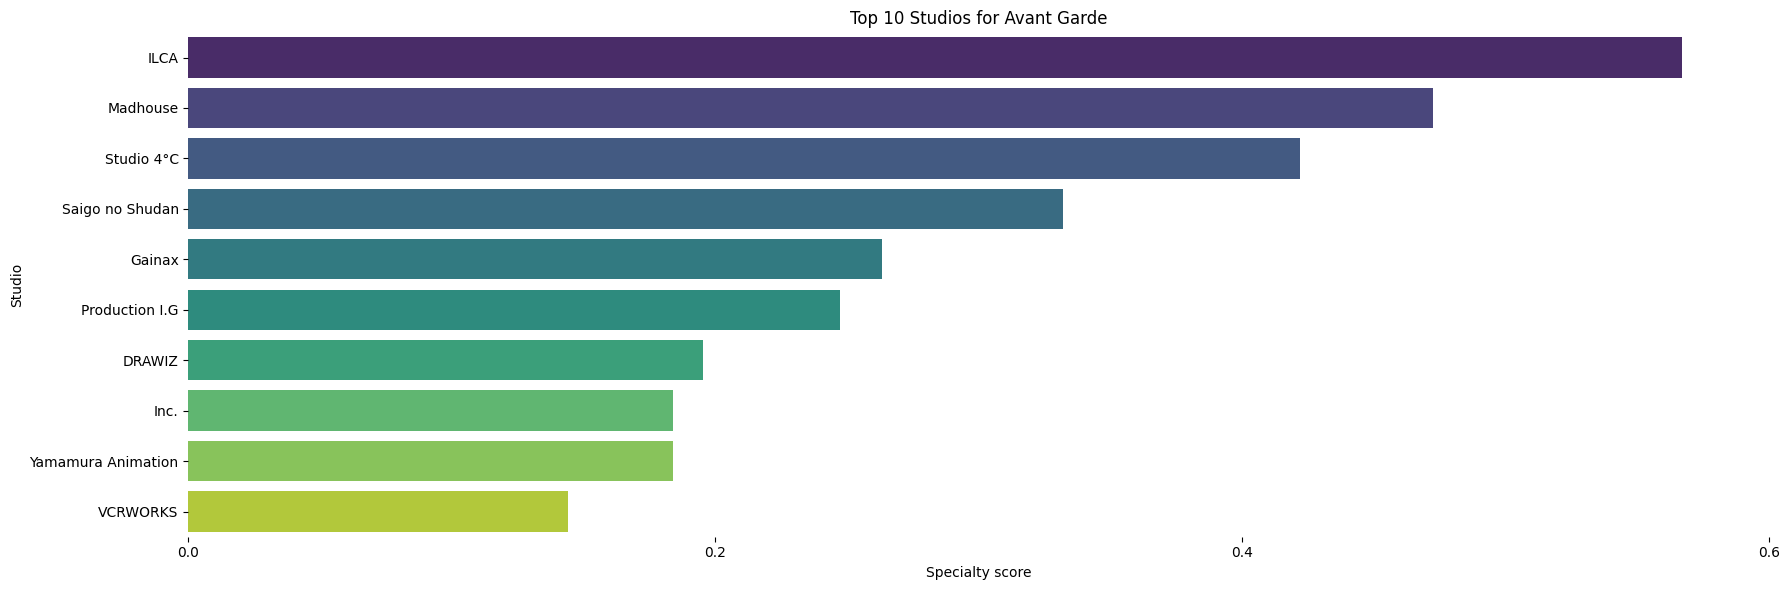

In [209]:
genres = ['Avant Garde']
drar_bar_chart(grouped_df, genres, 10, 1)

- Avant garde chỉ thể loại anime có phong cách nghệ thuật phá cách, có tính đổi mới. Ở thể loại này ta thấy được nhiều studio ít được thấy ở những thể loại khác như: ILCA, Saigo no Shudan, Studio 4°C, đây là các studio có phong cách nghệ thuật đặc trưng và sáng tạo.

##### Thể loại khoa học viễn tưởng (`Sci-Fi`)

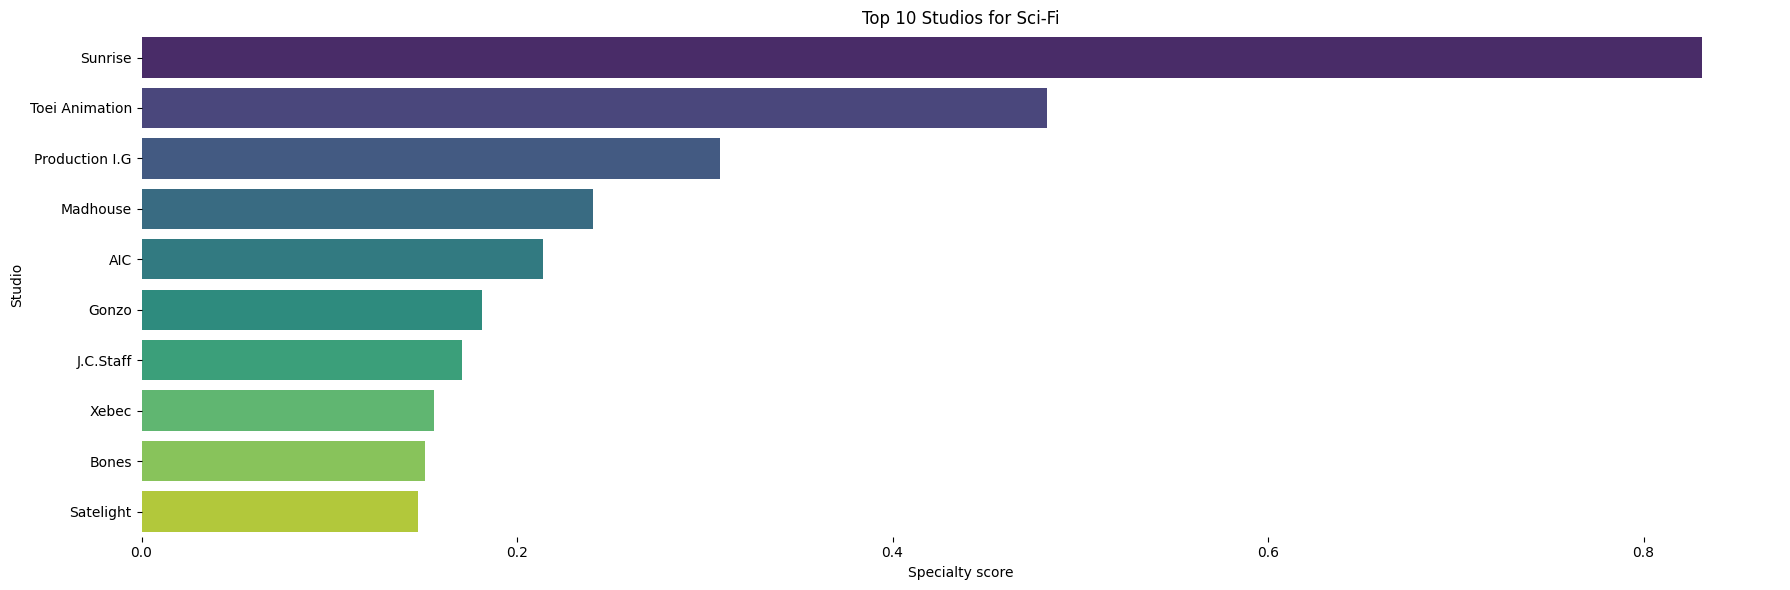

In [210]:
genres = ['Sci-Fi']
drar_bar_chart(grouped_df, genres, 10, 1)

- Sunrise dẫn dầu vượt xa các studio còn lại, đây là studio tạo ra serie Gundam kinh điển.


##### Các thể loại tâm lý, kinh dị và bí ẩn (`Drama`, `Horror`, `Mystery`, `Supernatural`, `Suspense`)

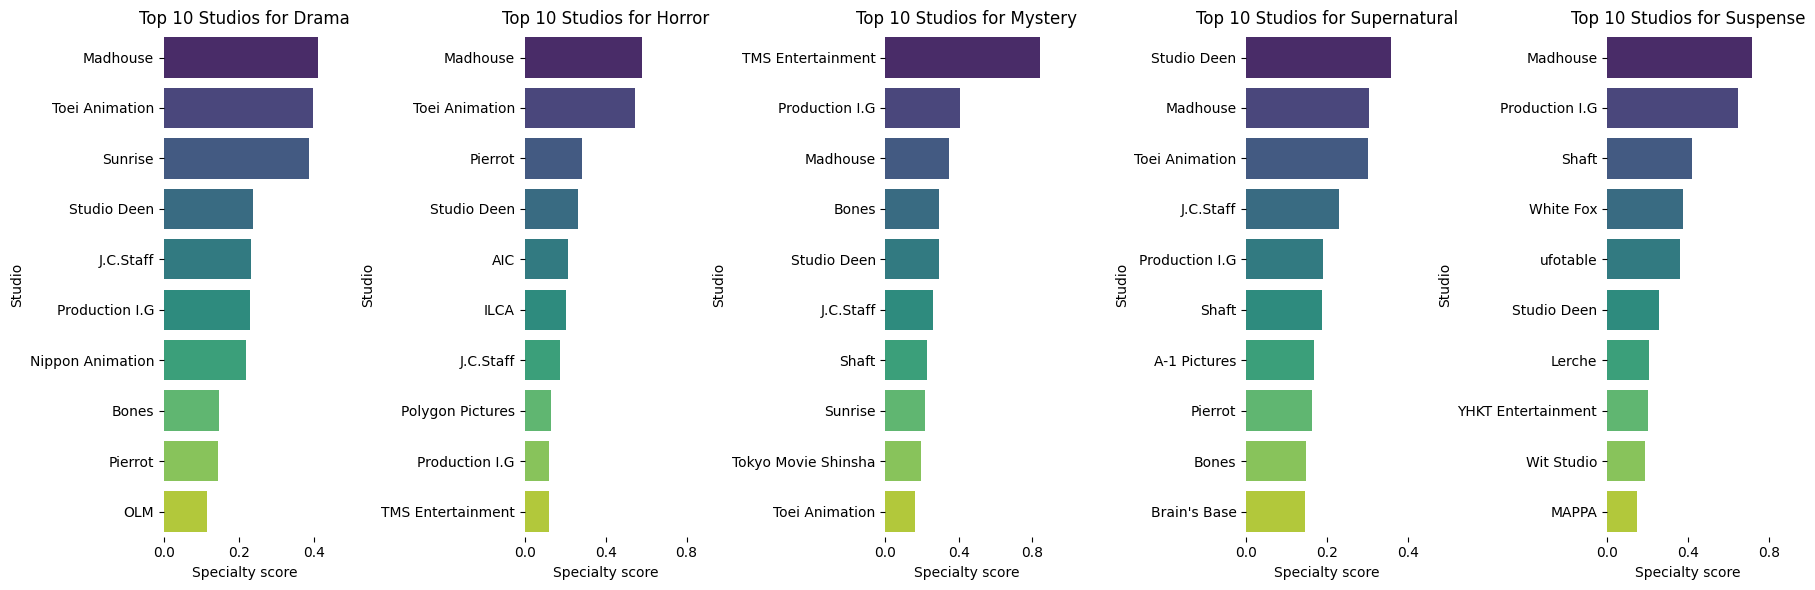

In [211]:
genres = ['Drama', 'Horror', 'Mystery', 'Supernatural', 'Suspense']
drar_bar_chart(grouped_df, genres, 10, 5)

- Madhouse thống trị nhóm này, đứng đầu cả ba thể loại Horror, Drama và Suspense và đứng nhì trong Supernatural. Có thể thấy studio này làm rất tốt trong các anime mang tính tâm lý, kinh dị, kịch tính (Monster, Hellsing, Tokyo Ghoul, Parasyte, Death note, ...). 
- Ở thể loại Mystery, TMS Entertainment vượt xa các anime còn lại (Detective Conan)
- Toei Animation lại lần nữa xuất hiện ở nhóm thể loại này, đứng top 2 ở Drama và Horror, điều này cho thấy sự đa dạng trong thể loại của studio này. Một trong những bộ tiêu biểu của Toei thuộc nhóm này là Devil man.

##### Các thể loại thể thao và ẩm thực (`Sports`, `Gourmet`)

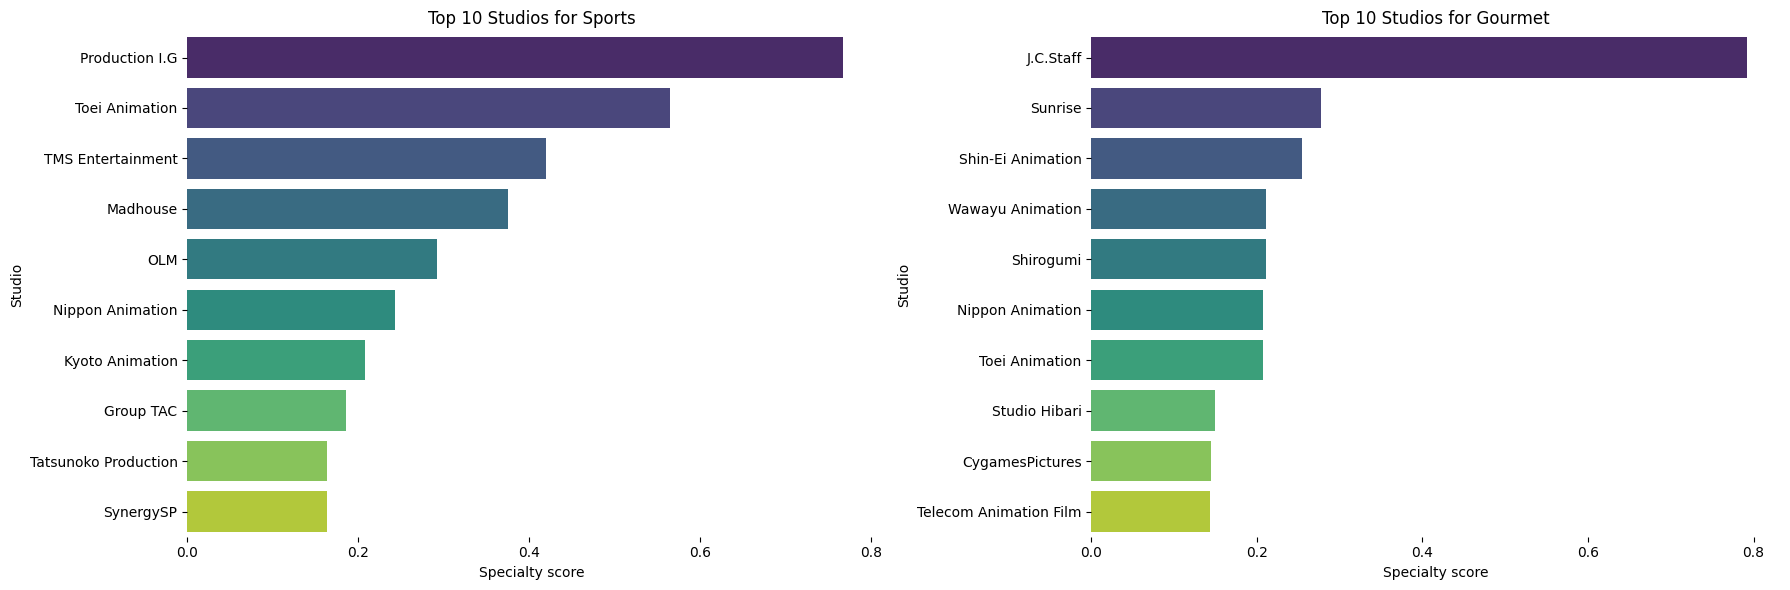

In [212]:
genres = ['Sports', 'Gourmet']
drar_bar_chart(grouped_df, genres, 10, 2)

- Đây là hai thể loại đặc thù hơn các thể loại khác nên mỗi studio chỉ cần vài anime nổi tiếng là đã có thể xếp hạng cao
- Production I.G vượt xa các đối thủ ở Sports (Haikyuu và Kuroko no Basket)
- J.C Staff gần như thống trị hoàn toàn bảng xếp hạng với Shokugeki no Soma 

##### Các thể loại `Boys Love`, `Girls Love`

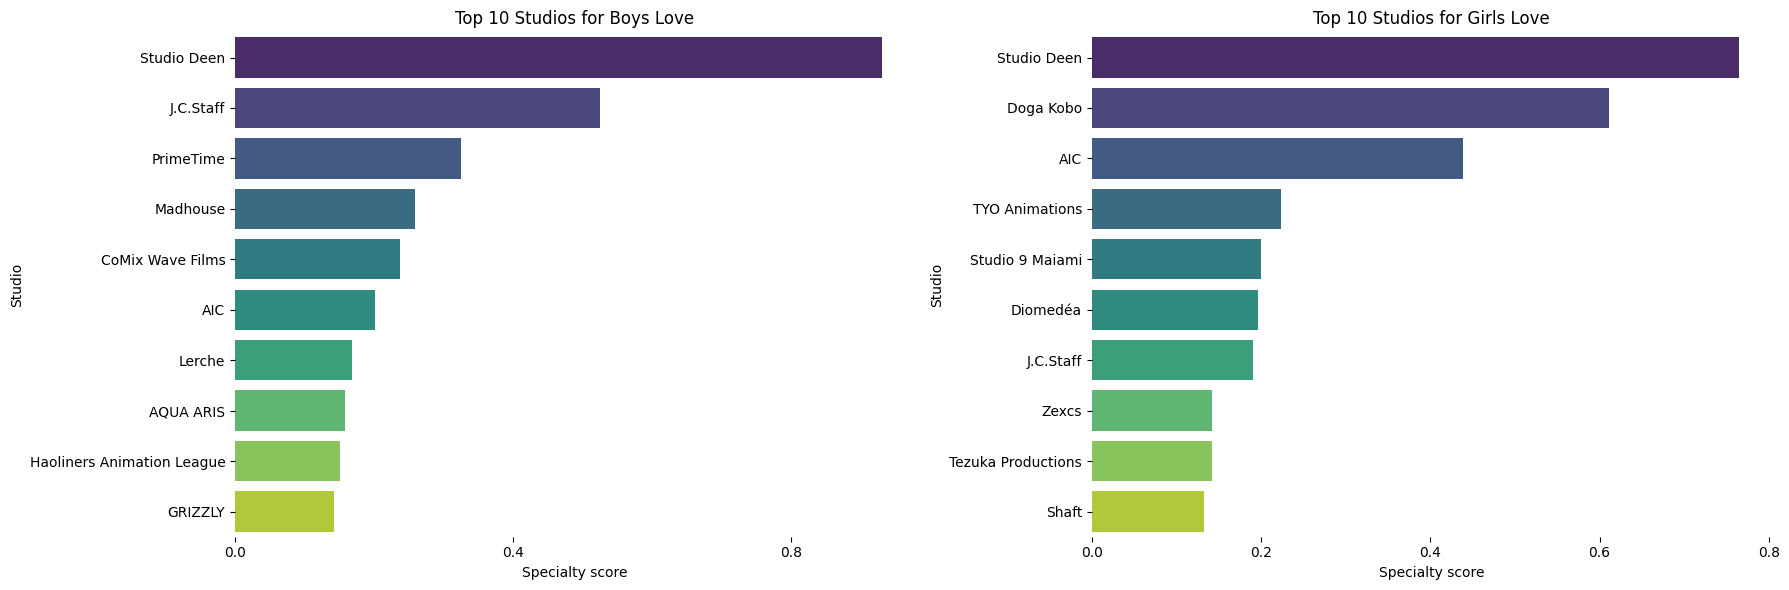

In [213]:
genres = ['Boys Love', 'Girls Love']
drar_bar_chart(grouped_df, genres, 10, 2)

- Đây là 2 thể loại cũng rất đặc thù.
- Studio Deen đứng top 1 ở cả hai, studio này cũng thuộc top 3 trong thể loại Romance, có thể thấy Deen làm rất tốt các anime mang yếu tố tình cảm.
- J.C.Staff - studio top 1 trong thể loại Romance cũng góp mặt ở thể loại Boys love.